# Analyzing My Personal Music Library: Trends, Moods, and Predictions.

I decided to analyze my personal playlists because I think that it would be interesting to see trends in what I listen to and predict what I will listen to in the future. My goal with this essay is to find correlations in my music and interpret that data to be able to understand my findings. 

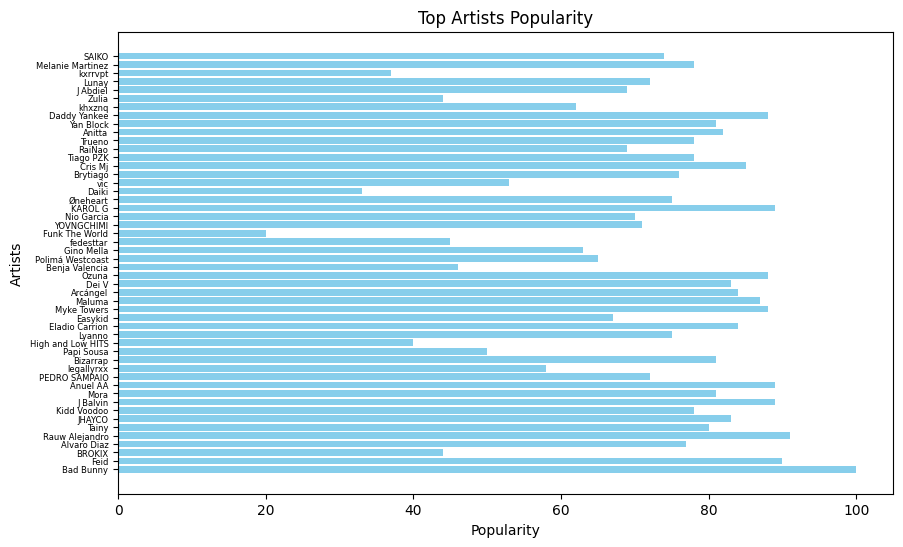

In [1]:
from spotipy import Spotify, SpotifyOAuth
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import requests

import os

load_dotenv("secrets.env")

spotify_client_id = os.getenv('SPOTIFY_CLIENT_ID')
spotify_client_secret = os.getenv('SPOTIFY_CLIENT_SECRET')
spotify_redirect_uri = os.getenv('SPOTIFY_REDIRECT_URI')

scope = "playlist-modify-public user-top-read user-library-read user-read-recently-played user-follow-read"

sp = Spotify(auth_manager=SpotifyOAuth(client_id=spotify_client_id, client_secret=spotify_client_secret, redirect_uri=spotify_redirect_uri, scope=scope))

# this will extract the top artists of all time from the user account
top_artists = sp.current_user_top_artists(limit=50, time_range='long_term')

artists = [artist for artist in top_artists['items']]

artists_df = pd.DataFrame(artists)

# Extracting the relevant information from the artists

plt.figure(figsize=(10, 6))
plt.barh(artists_df['name'], artists_df['popularity'], color='skyblue')
plt.xticks(fontsize=10)
plt.yticks(fontsize=6)
plt.ylabel('Artists')
plt.xlabel('Popularity')
plt.title('Top Artists Popularity')

plt.show()


### Interpretation

As you can see, I have plotted the popularity of my top 50 most listened to artists on a bar graph and its pretty evident that most of the artists I listen to are above the 50 percent popularity mark. To showcase this further, I will plot these onto a scatter plot to show the overall grouping of these artists.

             name  followers_total
0       Bad Bunny         95500028
1            Feid         17355621
2          BROKIX            18842
3     Alvaro Diaz          1293004
4  Rauw Alejandro         28545080


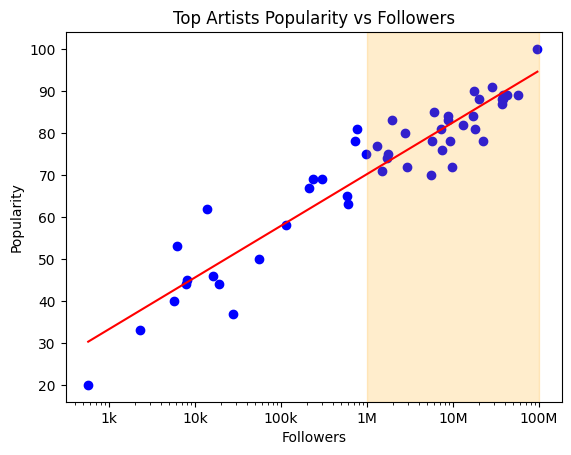

In [2]:
artists_df['followers_total'] = artists_df['followers'].apply(lambda x: x['total'])

print(artists_df[['name', 'followers_total']].head())

z = np.polyfit(np.log10(artists_df['followers_total']), artists_df['popularity'], 1)
p = np.poly1d(z)

plt.scatter(x=artists_df['followers_total'], y=artists_df['popularity'], color='blue')

plt.axvspan(1e6, 1e8, color='orange', alpha=0.2, label='Cluster: 1M-100M followers')

plt.title(label='Top Artists Popularity vs Followers')
plt.xlabel(xlabel='Followers')
plt.ylabel(ylabel='Popularity')
plt.xscale('log')

x_vals = np.logspace(
    np.log10(artists_df['followers_total'].min()),
    np.log10(artists_df['followers_total'].max()),
    100
)

ticks = [1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8]
labels = ['100', '1k', '10k', '100k', '1M', '10M', '100M']
plt.xticks(ticks, labels)

plt.plot(x_vals, p(np.log10(x_vals)), color='red', label='Trendline')

plt.show()

Here we can see that in my data, there is a particular cluster of artists that live around the 1M to 100M follower range.  It is evident that the amount of followers that a particular artist has, it generally has a positive correlation with their popularity in the spotify algorithm.

Now you do have some outliers in this trend, specifically in the 10K area where we can see one artist that has the same amount of popularity as multiple artists in the 900K range. This is most likely because of short term interest in a artists music, think one hit wonders. They are able to gain so much popularity and favor in the spotify algorithm because of their hits which allows them to ascend above some of the more followed artists. 

I could be wrong about my interpretation of this data, but the beauty of data science is that the interpretation of data is mostly subjective when it comes to data that does not have a clear cause and effect. This means that the data could very well represent something completely different from what the one hit wonder example I gave.

Anyway, to continue my deep dive on my spotify, I'm going to analyze the genres I listen to and plot them on a pie chart to visualize the amount of each genre I listen to.

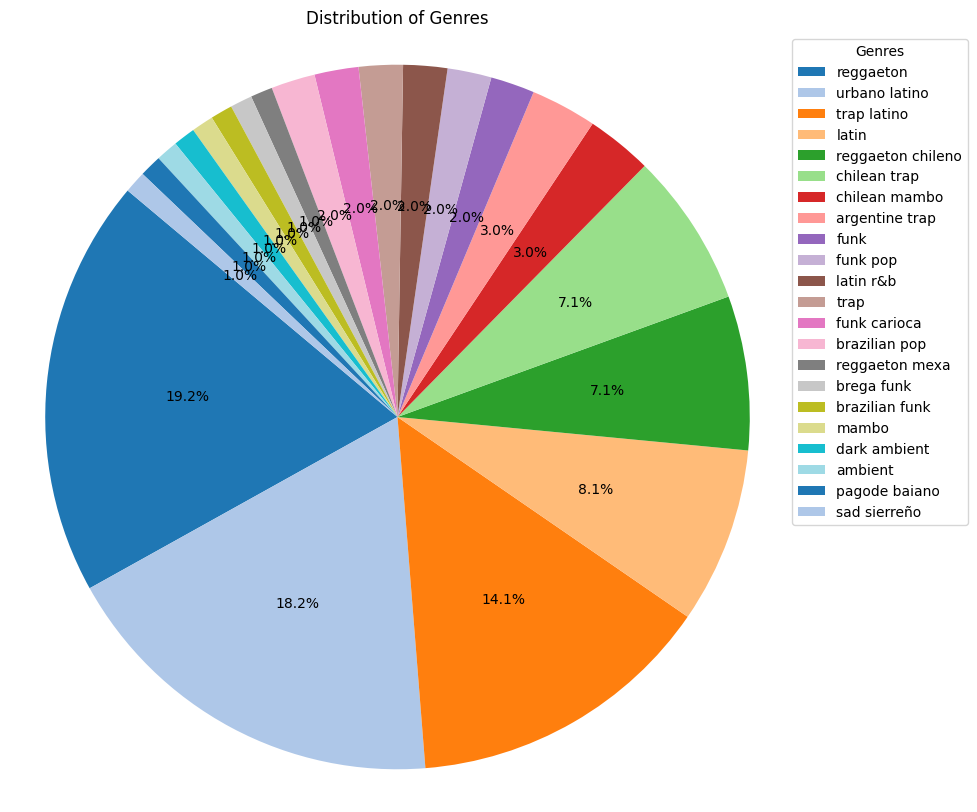

In [3]:
all_genres = [genre for genres in artists_df['genres'] for genre in genres if genre != '' and genre != 'None']

genres_series = pd.Series(all_genres)

# Create the pie chart with genres
plt.figure(figsize=(10, 10))
plt.pie(x=genres_series.value_counts(), autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Genres')
plt.axis('equal') 
plt.legend(title='Genres', loc='upper left', bbox_to_anchor=(1, 1), labels=genres_series.value_counts().index)
plt.show()

As you can see here, as expected, there is a major chunk of my artists that are in the reggaeton and urbano latino genres which is very consistent to what I actually listen to. This visualization serves as a very good way to see what you truly listen to the majority of the time, in my case, its reggaeton and urbano latino.

Now this genre data is good and all but im not able to give any more interpretation of this data simply because its very obvious as to why I listen to these genres, its because of my upbringing and where my family is from. These two factors made it highly likely I would like these songs because of their cultural significance in my life. 

To gain more insight on my listening habits, I will analyze the release data of the songs in my playlists and plot them to hopefully see a clear grouping of points that will reveal the average release data of the a given song I listen to. 

This should allow me to be able to see if I listen to more modern songs or more older songs.

Playlist ID: 4bQaEk77zeRqRMZRMZbQuQ, Playlist Name: Fahrenheit-451™
i tried to kill myself two days ago and no one noticed - Release Date: 2023-12-22
Ache - Release Date: 2023-10-20
overdose. - Release Date: 2025-01-03
3 am walk - Slowed & Reverb Version - Release Date: 2022-11-11
Moonlight on the River - Release Date: 2017-05-05
Playlist ID: 3DH9MvFrMhuRjTkSmCKyCC, Playlist Name: año escolar 2024 - 2025
A 300 - Release Date: 2023-02-17
FICHAJE DEL AÑO - Release Date: 2024-07-25
Amiri Jeans - Remix - Release Date: 2024-07-18
Café - Release Date: 2024-07-19
Aroma - Release Date: 2024-07-19
Ahora que no estás sola - Release Date: 2024-07-30
DESDE QUE TE FUISTE - Release Date: 2023-02-09
Marte - Release Date: 2022-02-10
G Spot - Release Date: 2023-04-13
Vete Pal Carajo - Release Date: 2020-11-25
Dile Que Tu Me Quieres - Release Date: 2017-08-25
GHINI - Release Date: 2024-05-23
Instinto - Release Date: 2024-07-04
ANDO CON EL KI - Release Date: 2024-07-18
3 Deseos Remix (with Dalex & Eix, f

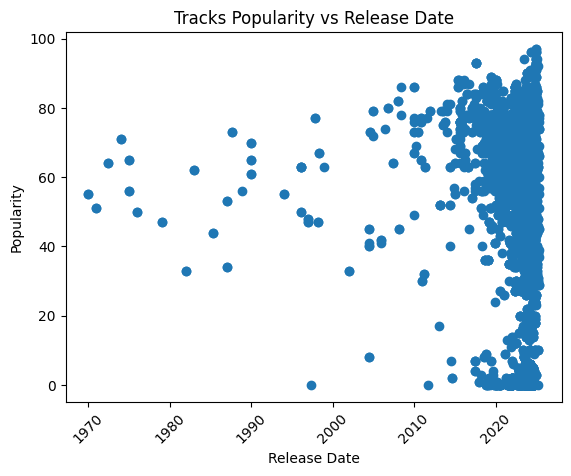

In [4]:
# First we need to collect the tracks from the user's library
playlists= sp.current_user_playlists(limit=50, offset=0)

all_tracks = []

for playlist in playlists['items']:
    playlist_id = playlist['id']
    playlist_name = playlist['name']
    print(f"Playlist ID: {playlist_id}, Playlist Name: {playlist_name}")
   
    # Get the tracks in the playlist
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']
    
    # Loops through the pages of results and collect tracks
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
        
    all_tracks.extend(tracks)
    
    # Print the track names
    # this is more just to see if the code works
    for item in tracks:
        track = item['track']
        if track and track.get('album') and track['album'].get('release_date'):
            release_date = track['album']['release_date']
            print(f"{track['name']} - Release Date: {release_date}")
        else:
            print(f"{track['name'] if track else 'Unknown'} - Release Date: None")
            
tracks_df = pd.DataFrame(all_tracks)

# Now we have to normalize our data to make sure release dates are datetime objects
tracks_df['release_dates'] = tracks_df['track'].apply(
    lambda x: pd.to_datetime(x['album']['release_date']) if x and x.get('album') and x['album'].get('release_date') else None
)

print(tracks_df['release_dates'])

plt.scatter(x=tracks_df['release_dates'], 
            y=tracks_df['track'].apply(lambda x: x['popularity'] if x else 0))
plt.title('Tracks Popularity vs Release Date')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()

            


As you can see, ive collected almost every single song that has been saved on my spotify account and I have plotted them to show that most of my songs fall under the 2020s and as we go further back in time, you can see less and less tracks. This is most likely because some of the tracks saved on my spotify account are really old salsa songs (1970s) and thats why you see some dots really far back in time.

## Interpretation

Now that I have completed my data collection and created figures based on my data, I would like to talk about my listening habits and really take a deep dive. I expected my listening habits to be pretty stagnant, and this has been expressed mostly in the genres I listen to—you can see I listen to mostly reggaeton and urbano latino. Looking at the figure, the percentages of genres that I listen to are not varied at all, mostly just variations of generally the same sound. This is because my music taste has been influenced by my Puerto Rican heritage and the environment I was raised in.

However, one of the things that surprised me was that I had a pretty significant percentage of my music fall under Chilean reggaeton, and I don't feel that I specifically like Chilean reggaeton, so it was definitely a surprise that I didn't expect. Overall, my genre findings didn't generally surprise me, and even my less-listened genres still included Latin-inspired music like Brazilian pop and mambo. 

Next, as you can see, I've collected almost every single song that has been saved on my Spotify account, and I have plotted them to show that most of my songs fall under the 2020s. As we go further back in time, you can see fewer and fewer tracks. This is most likely because some of the tracks saved on my Spotify account are really old salsa songs (1970s), and that's why you see some dots really far back in time.

Next, when I look at my top 50 most listened-to artists on Spotify, I can see a clear trend that shows most of my most listened-to artists fall under a cluster of 1M to 100M followers, showing that I listen to well-known mainstream artists. Another thing I would like to point out is that generally in the Spotify algorithm, the more popular an artist is, the more followers they will have. Now this is pretty obvious, but when we look at the data, there are some outliers that show up. This is most clearly seen when one artist with 10K followers seems to have the same amount of popularity in the Spotify algorithm as some artists in the 100K and 1M range. I found this interesting because it made me think about what that artist could have done to have the popularity of someone with 10x more followers than them. Thinking about it, I thought that maybe that artist has had some recent hits that have caused them to have a surge in popularity in the Spotify algorithm, or they simply are just more relevant today than the other artists.

In conclusion, based on my findings, I generally listen to the same sound consisting of reggaeton and urbano latino. Also, I seem to listen to artists that are very popular and mainstream. All of this shows that I have very stagnant listening habits that don't seem to change much over time, and I can say with certainty that I have an established musical palette that is based on my heritage and how I grew up. These findings really have opened my eyes to how others may have significantly different musical palettes and potentially listen to more diverse music over time.